# Microtask For CHAOSS

### This Jupyter Notebook is using OSSF-scorecard API and libraries.io to generate visulaisation for identified Dependencies in different Open Source Projects

**Note**: If you want to use this Jupyter notebook in your local machines, make sure to create a virtual environment and activate it and install pandas,requests,numpy,matplotlib,jupyter. We can do it by writing the following in terminal.

` $pip install pandas `

` $pip install requests `

` $pip install matplotlib `

` $pip install jupyter `

` $pip install numpy ` 

And then finally run the notebook.

---

So First I have used OSSF Api, The initaial is just the Confidence Scores for different parameters of a random repository that the api returned. This not much detailed but is basically an Api check  

In [1]:
import requests
from matplotlib import pyplot as plt

In [2]:
con_score = []
con_index = [0,1,2,3,4,5,6,7,8,9,10,11,12] 

In [4]:
reponse = requests.get("https://storage.googleapis.com/ossf-scorecards/latest.json")
card=reponse.json()

In [5]:
for repo in card['results'][0]['Checks']:
    con_score.append(int(repo['Confidence']))

<function matplotlib.pyplot.show(close=None, block=None)>

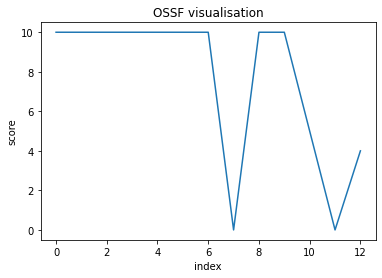

In [6]:
plt.plot(con_index, con_score)
plt.xlabel('index')
plt.ylabel('score')
plt.title('OSSF visualisation')
plt.show

### This is a graph for a random repo with their OSSF confidence Score for various checks

In [7]:
p=0
f=0

In [19]:
    
for repo in card['results']:
    if repo['Checks'][2]['Pass'] == True:
        p+=1
    if repo['Checks'][2]['Pass'] == False:
        f+=1

print(f,p)

2258 141


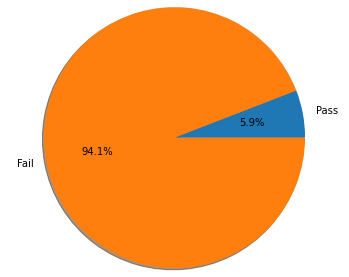

In [21]:
cii_list = [p,f]
cii_label = ['Pass','Fail']
plt.axis("equal")
plt.pie(cii_list,labels=cii_label,shadow=True, autopct='%1.1f%%',radius=1.5)
plt.show()

### This is a pie Chart representing repositories that are passing CII best practises check according to OSSF.

---
---

### From here we start using libraries.io


### projects is a list that contain list of projects that you want to know about dependencies they have(We can add more if we want)  

In [25]:
no_dependencies =[]

projects = [
    'microsoft/vscode',
    'microsoftdocs/azure-docs',
    'flutter/flutter',
    'firstcontributions/first-contributions',
    'tensorflow/tensorflow',
    'facebook/react-native',
    'kubernetes/kubernetes',
    'definitelytyped/definitelytyped',
    'ansible/ansible',
    'gruntjs/grunt',
]

Here **try and except** is used specifically becuse of weird API response for some projects

In [26]:
for project in projects:
    response = requests.get("https://libraries.io/api/github/{}/dependencies?api_key=ac15d698445b751243b8e77a1c7dbb09".format(project))
    bard = response.json()
    try:
        no_dependencies.append(len(bard['dependencies']))
        # print()
    except:
        print("exception raised for dependencies for{}".format(project))

In [27]:
print(no_dependencies)

[5657, 0, 4002, 0, 37, 2403, 290, 345, 220, 24]


In [28]:
import numpy as np

In [29]:
xpos = np.arange(len(projects))
xpos

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

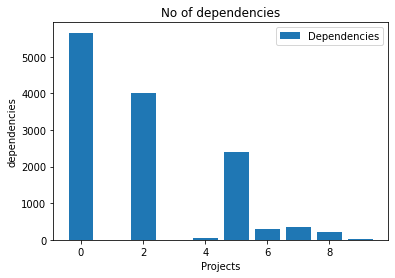

In [30]:
plt.bar(xpos,no_dependencies, label="Dependencies")

# plt.xticks(xpos, )
plt.ylabel("dependencies")
plt.xlabel("Projects")
plt.title('No of dependencies')
plt.legend()

### This is a bar graph showing the number of dependencies (identified) for the list of projects mentions in the above list 

In [55]:
import pandas as pd

r = requests.get("https://libraries.io/api/github/Dhruv-Sachdev1313/dependencies?api_key=ac15d698445b751243b8e77a1c7dbb09")
deps = r.json()
dep_repo_count=[]
dep_counts=[] 
for dep in deps:
    dep_repo_count.append(dep['dependent_repos_count'])
    dep_counts.append(dep['dependents_count'])
    print(dep['name'])

flutter
cupertino_icons
meta
args
collection
pedantic
quiver
crypto
path
string_scanner
stack_trace
async
image
test_api
vector_math
source_span
convert
xml
archive
matcher
stream_channel
typed_data
charcode
petitparser
boolean_selector
term_glyph
sky_engine
Flutter
image_picker
http


### This is a list of all dependencies that my repositories depends on and are arranged in decending order of their frequency 

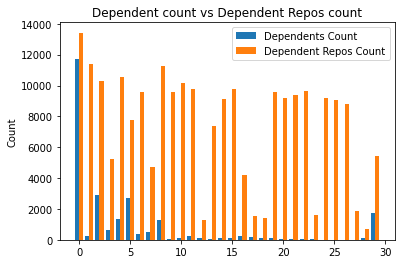

In [61]:
xpos = np.arange(len(dep_counts))
plt.bar(xpos-0.2,dep_counts, width = 0.4,label="Dependents Count")
plt.bar(xpos+0.2,dep_repo_count, width=0.4,label="Dependent Repos Count")
plt.ylabel("Count")
# plt.xlabel("")
plt.title('Dependent count vs Dependent Repos count')
plt.legend()

---

### This was a very basic implemetation of using dependency data. We can always use a lot of other data to make various conclusions. 